In [13]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#set the style
sns.set(context='notebook', style='whitegrid', palette='tab10', font='sans-serif')

# Modelo SIR

In [14]:
# Funcion para resolver el modelo SIR

def ds_dt_sir(t, S, I, beta, gamma, N):
    return -beta * S * I/N

def di_dt_sir(t, S, I, beta, gamma, N):
    return beta * S * I/N - gamma * I

def RK4_SIR(t, dt, beta, gamma, N):
    global S, I, R
    
    ds1 = ds_dt_sir(t, S, I, beta, gamma, N)
    di1 = di_dt_sir(t, S, I, beta, gamma, N)

    ds2 = ds_dt_sir(t + dt/2, S + ds1*dt/2, I + di1*dt/2, beta, gamma, N)
    di2 = di_dt_sir(t + dt/2, S + ds1*dt/2, I + di1*dt/2, beta, gamma, N)

    ds3 = ds_dt_sir(t + dt/2, S + ds2*dt/2, I + di2*dt/2, beta, gamma, N)
    di3 = di_dt_sir(t + dt/2, S + ds2*dt/2, I + di2*dt/2, beta, gamma, N)

    ds4 = ds_dt_sir(t + dt, S + ds3*dt, I + di3*dt, beta, gamma, N)
    di4 = di_dt_sir(t + dt, S + ds3*dt, I + di3*dt, beta, gamma, N)

    S += (ds1 + 2*ds2 + 2*ds3 + ds4)*dt/6
    I += (di1 + 2*di2 + 2*di3 + di4)*dt/6
    R = 1 - S - I


In [15]:
#modelo SIR

def SIR(T, dt, beta, gamma, I0, S0, R0, N):
    global S, I, R
    S = S0
    I = I0
    R = R0
    #t_range = np.arange(0, T, dt)

    sir = pd.DataFrame(columns=['S', 'I', 'R'], index= np.arange(0, T, dt))
    sir.index.name = 't'

    for t in sir.index:
        sir.loc[t] = [S, I, R]
        RK4_SIR(t, dt, beta, gamma, N)

    sir.plot(y="S", use_index=True)
    plt.plot(sir.index.to_numpy(), sir['I'].to_numpy(), label='I')
    plt.plot(sir.index.to_numpy(), sir['R'].to_numpy(), label='R')
    plt.xlabel('Time')
    plt.ylabel('Population fraction')
    plt.title('SIR model')
    plt.legend()
    sns.despine()
    print("poblacion final:", sir.iloc[-1].sum())
    
    return sir



# Modelo SAIRD

In [16]:
# funciones para resolver el modelo SAIRD

def ds_dt(t, S, A, I , beta, alpha, N):
    return -beta * S/N * I - alpha * S/N * A

def da_dt(t, S, A, I, beta, gamma, alpha, delta, rho1, rho2, N):
    return (1 - rho1) * alpha * S/N * A + rho2 * beta * I * S/N - delta * A - gamma * A

def di_dt(t, S, A, I, beta, gamma, alpha, delta, rho1, rho2, N):
    return (1 - rho2) * beta * I * S/N + rho1 * alpha * A * S/N - gamma * I - delta * I

def dr_dt(t, A, I, gamma):
    return gamma * (I + A)

def dd_dt(t, A, I, delta):
    return delta * (I + A)


def RK4_SAIRD(t, dt, beta, gamma, alpha, delta, rho1, rho2, N):
    global S, A, I, R, D

    ds1 = ds_dt(t, S, A, I, beta, alpha, N)
    da1 = da_dt(t, S, A, I, beta, gamma, alpha, delta, rho1, rho2, N)
    di1 = di_dt(t, S, A, I, beta, gamma, alpha, delta, rho1, rho2, N)
    dr1 = dr_dt(t, A, I, gamma)
    #dd1 = dd_dt(t, A, I, delta)

    ds2 = ds_dt(t + dt/2, S + ds1*dt/2, A + da1*dt/2, I + di1*dt/2, beta, alpha, N)
    da2 = da_dt(t + dt/2, S + ds1*dt/2, A + da1*dt/2, I + di1*dt/2, beta, gamma, alpha, delta, rho1, rho2, N)
    di2 = di_dt(t + dt/2, S + ds1*dt/2, A + da1*dt/2, I + di1*dt/2, beta, gamma, alpha, delta, rho1, rho2, N)
    dr2 = dr_dt(t + dt/2, A + da1*dt/2, I + di1*dt/2, gamma)
    #dd2 = dd_dt(t + dt/2, A + da1*dt/2, I + di1*dt/2, delta)

    ds3 = ds_dt(t + dt/2, S + ds2*dt/2, A + da2*dt/2, I + di2*dt/2, beta, alpha, N)
    da3 = da_dt(t + dt/2, S + ds2*dt/2, A + da2*dt/2, I + di2*dt/2, beta, gamma, alpha, delta, rho1, rho2, N)
    di3 = di_dt(t + dt/2, S + ds2*dt/2, A + da2*dt/2, I + di2*dt/2, beta, gamma, alpha, delta, rho1, rho2, N)
    dr3 = dr_dt(t + dt/2, A + da2*dt/2, I + di2*dt/2, gamma)
    #dd3 = dd_dt(t + dt/2, A + da2*dt/2, I + di2*dt/2, delta)

    ds4 = ds_dt(t + dt, S + ds3*dt, A + da3*dt, I + di3*dt, beta, alpha, N)
    da4 = da_dt(t + dt, S + ds3*dt, A + da3*dt, I + di3*dt, beta, gamma, alpha, delta, rho1, rho2, N)
    di4 = di_dt(t + dt, S + ds3*dt, A + da3*dt, I + di3*dt, beta, gamma, alpha, delta, rho1, rho2, N)
    dr4 = dr_dt(t + dt, A + da3*dt, I + di3*dt, gamma)
    #dd4 = dd_dt(t + dt, A + da3*dt, I + di3*dt, delta)

    S += (ds1 + 2*ds2 + 2*ds3 + ds4)*dt/6
    A += (da1 + 2*da2 + 2*da3 + da4)*dt/6
    I += (di1 + 2*di2 + 2*di3 + di4)*dt/6
    R += (dr1 + 2*dr2 + 2*dr3 + dr4)*dt/6
    #D += (dd1 + 2*dd2 + 2*dd3 + dd4)*dt/6
    D = N - S - A - I - R
    #R = N - S - A - I - D

In [17]:
def SAIRD(T, dt, beta, gamma, alpha, delta, rho1, rho2, S0, A0, I0, R0, D0, N):
    global S, A, I, R, D
    S = S0
    A = A0
    I = I0
    R = R0
    D = D0

    saird = pd.DataFrame(columns=['S', 'A', 'I', 'R', 'D'], index= np.arange(0, T, dt))
    saird.index.name = 't'

    for t in saird.index:
        saird.loc[t] = [S, A, I, R, D]
        RK4_SAIRD(t, dt, beta, gamma, alpha, delta, rho1, rho2, N)
    
    saird.plot(y="S", use_index=True)
    plt.plot(saird.index.to_numpy(), saird['A'].to_numpy(), label='A')
    plt.plot(saird.index.to_numpy(), saird['I'].to_numpy(), label='I')
    plt.plot(saird.index.to_numpy(), saird['R'].to_numpy(), label='R')
    plt.plot(saird.index.to_numpy(), saird['D'].to_numpy(), label='D')
    plt.xlabel('Time')
    plt.ylabel('Population fraction')
    plt.title('SAIRD model')
    plt.legend()
    sns.despine()
    print("poblacion final:", saird.iloc[-1].sum())

    return saird

# Modelos y pruebas

poblacion final: 1.0
poblacion final: 1.0
SAIRD
              S    A         I         R    D
t                                            
99.95   0.01358  0.0  0.003986  0.982434 -0.0
99.96   0.01358  0.0  0.003983  0.982437 -0.0
99.97   0.01358  0.0   0.00398   0.98244 -0.0
99.98   0.01358  0.0  0.003977  0.982443 -0.0
99.99  0.013579  0.0  0.003974  0.982446 -0.0
SIR
              S         I         R
t                                  
99.95   0.01358  0.003986  0.982434
99.96   0.01358  0.003983  0.982437
99.97   0.01358   0.00398   0.98244
99.98   0.01358  0.003977  0.982443
99.99  0.013579  0.003974  0.982446


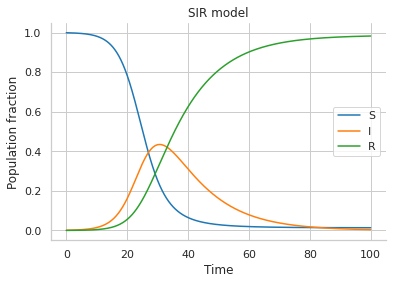

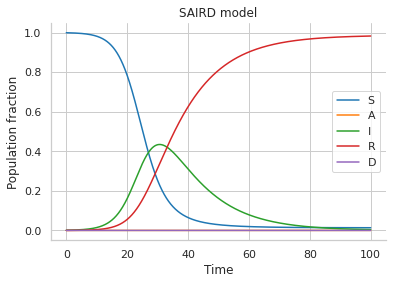

In [21]:
sir = SIR(100, 0.01, 0.35, 0.08, 0.001, 0.999, 0, 1)
saird = SAIRD(100, 0.01, 0.35, 0.08, 0, 0, 0, 0, 0.999, 0, 0.001, 0, 0, 1)

print("SAIRD")
print(saird.tail())
print("SIR")
print(sir.tail())

poblacion final: 1000.0000000000001


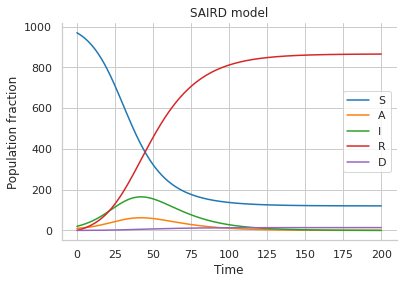

In [19]:
saird = SAIRD(200, 0.01, 0.17, 1/16, 0.1, 0.001, 0.8, 0.29, 970, 10, 20, 0, 0, 1000)